In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from keras.wrappers.scikit_learn import KerasRegressor
import os.path
from os import path
from pylab import rcParams
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import freq_to_period
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import pickle
import os
import joblib

In [ ]:
pip install openai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 KB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 7.9 MB/s eta 0:00:00
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55880 sha256=da2402fdacefbabdd7178c16b39f60ca6fca78fecba78ddd2ebf5d18a9cdda56
  Stored in directory: /root/.cache/pip/wheels/4b/92/33/6f57c7aae0b16875267999a50570e81f15eecec577ebe05a2e
Successfully built openai


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dữ liệu Lịch sử VN Index.csv")
data

,Date,Close,Open,High,Low,Vol,% Change
0,2009-01-02,313.34,312.49,313.34,312.18,5.63K,-0.72%
1,2009-01-05,311.91,308.77,311.91,308.25,7.92K,-0.46%
2,2009-01-06,314.04,312.91,315.02,312.88,12.97K,0.68%
3,2009-01-07,319.58,320.40,322.59,319.29,14.75K,1.76%
4,2009-01-08,314.15,315.92,318.79,313.04,14.94K,-1.70%
...,...,...,...,...,...,...,...
3476,2022-12-06,1048.69,1093.67,1093.67,1048.69,1.48M,-4.11%
3477,2022-12-07,1041.02,1048.69,1059.79,1034.92,920.94K,-0.73%
3478,2022-12-08,1050.53,1041.02,1078.09,1041.02,916.99K,0.91%
3479,2022-12-09,1051.81,1050.53,1061.21,1041.39,788.20K,0.12%


In [ ]:
data.Date = pd.to_datetime(data.Date, dayfirst = False)
data.set_index("Date", inplace = True)

In [ ]:
data = data[['Close']] # Just use the close price
data

,Close
Date,
2009-01-02,313.34
2009-01-05,311.91
2009-01-06,314.04
2009-01-07,319.58
2009-01-08,314.15
...,...
2022-12-06,1048.69
2022-12-07,1041.02
2022-12-08,1050.53


In [ ]:
data.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12'],
              dtype='datetime64[ns]', name='Date', length=3481, freq=None)

In [ ]:
size_train = int(len(data)*0.80) 
train_data = data[0:size_train] 
test_data = data[size_train:]

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

time_step = 30
X_train, y_train = create_dataset(train_data['Close'], time_step)
X_test, y_test = create_dataset(test_data['Close'], time_step)


In [ ]:
X_train_copy = X_train
y_train_copy = y_train
X_test_copy = X_test
y_test_copy = y_test

In [ ]:
scaler_test = MinMaxScaler(feature_range=(0,1))
scaler_train = MinMaxScaler(feature_range=(0,1))

X_train = scaler_train.fit_transform(X_train)
X_test  = scaler_test.fit_transform(X_test)
y_train = scaler_train.fit_transform(y_train.reshape(-1,1))
y_test = scaler_test.fit_transform(y_test.reshape(-1,1))

In [ ]:
model_XGBM = XGBRegressor()

model_XGBM.fit(X_train, y_train, verbose=False)


[07:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_test_XGBM = model_XGBM.predict(X_test)

In [ ]:
y_pred_test_XGBM = scaler_test.inverse_transform(y_pred_test_XGBM.reshape(-1,1))


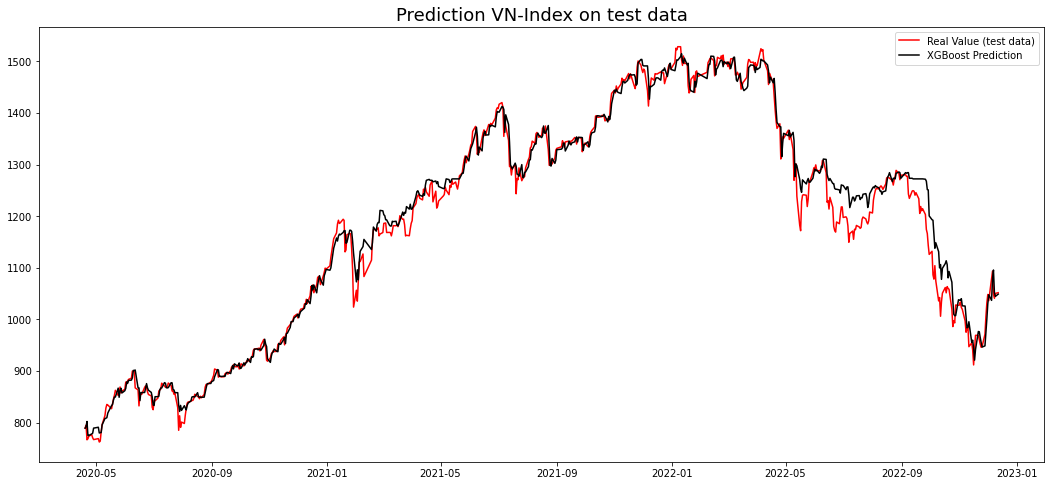

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(data.index[2815:], y_test_copy, color="red", label=f"Real Value (test data)")
plt.plot(data.index[2815:],y_pred_test_XGBM,color="black", label = 'XGBoost Prediction')
plt.title('Prediction VN-Index on test data', fontsize=18)
plt.legend()

In [ ]:
y_pred_train_XGBM = model_XGBM.predict(X_train)  

In [ ]:
y_pred_train_XGBM = scaler_train.inverse_transform(y_pred_train_XGBM.reshape(-1,1))


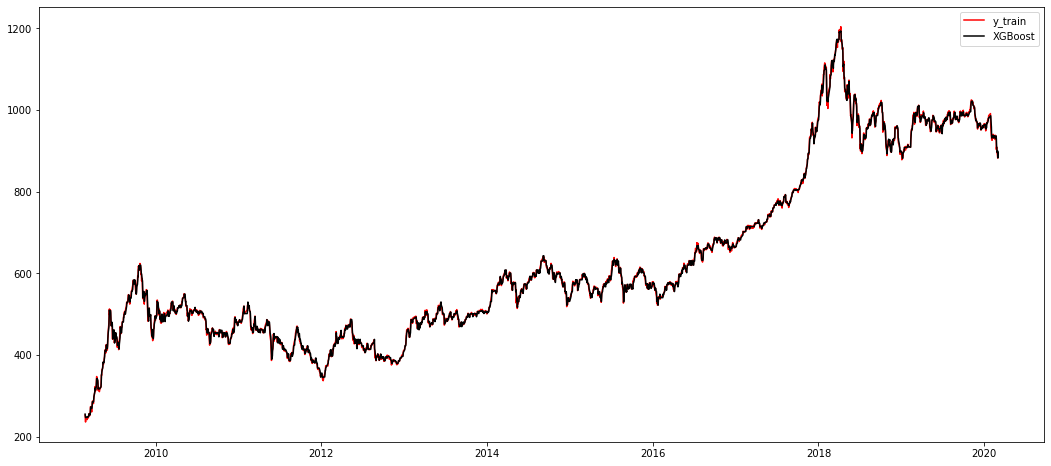

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(data.index[31:2784],y_train_copy, label = 'y_train', color="red")
plt.plot(data.index[31:2784],y_pred_train_XGBM, label = 'XGBoost', color="black")
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.legend()

In [ ]:
print("TẬP TEST                           TẬP TRAIN")
print("")
print("XGBoost")
print("MSE  : " + str(mean_squared_error(y_test_copy, y_pred_test_XGBM))
+"  ||  " + str(mean_squared_error(y_train_copy, y_pred_train_XGBM)))
print("MAE  : " + str(mean_absolute_error(y_test_copy, y_pred_test_XGBM))
+"  ||  " + str(mean_absolute_error(y_train_copy, y_pred_train_XGBM)))
print("MAPE : " + str(mean_absolute_percentage_error(y_test_copy, y_pred_test_XGBM)*100)
+"  ||  " + str(mean_absolute_percentage_error(y_train_copy, y_pred_train_XGBM)*100))
print("R2   : " + str(round(metrics.r2_score(y_test_copy, y_pred_test_XGBM), 15))
+"  ||  "  + str(round(metrics.r2_score(y_train_copy, y_pred_train_XGBM), 15)))

TẬP TEST                           TẬP TRAIN

XGBoost
MSE  : 683.6522309797587  ||  35.38645416162337
MAE  : 17.382067911417277  ||  4.419868217493204
MAPE : 1.4973163709462363  ||  0.7673472164441192
R2   : 0.985588419859508  ||  0.999199100161281


In [ ]:
Prediction_XGBM_30days= X_test[[len(X_test)-1]]

In [ ]:
i = 0
while i < 30:
  Prediction_XGBM_30days= np.append(Prediction_XGBM_30days, model_XGBM.predict(Prediction_XGBM_30days))
  Prediction_XGBM_30days= np.delete(Prediction_XGBM_30days, 0)
  Prediction_XGBM_30days = Prediction_XGBM_30days.reshape(1,30)
  i = i + 1

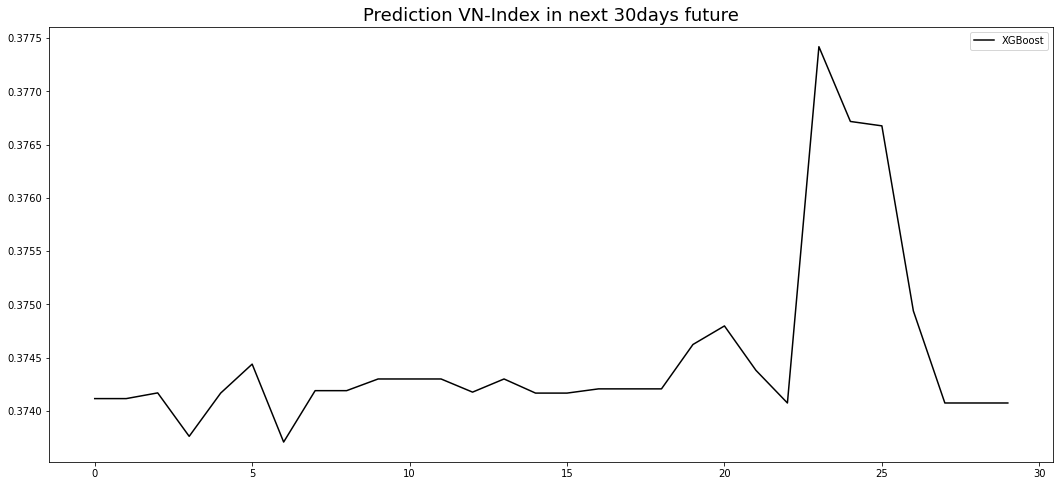

In [ ]:
plt.figure(figsize= (18, 8))
plt.plot(Prediction_XGBM_30days[0,:], label = 'XGBoost', color="black")
plt.title('Prediction VN-Index in next 30days future', fontsize=18)
plt.legend()